In [84]:
from numpy import loadtxt
from numpy import cumsum
from numpy import digitize
import numpy as np
import random
from IPython.core.display import display, HTML
import generate_board
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [85]:
grid,words= generate_board.make_grid()

In [86]:
dictionary = words
dictionary

['SUBSTITUTIONS', 'GRIPED', 'COGITATOR', 'CONVEXLY', 'DARTING']

In [87]:
_end = '_end_'
def make_trie(words = []):
    root = dict()
    for word in words:
        current_dict = root
        for letter in word:
            current_dict = current_dict.setdefault(letter, {})
        current_dict = current_dict.setdefault(_end, _end)
    return root

In [88]:
t = make_trie(dictionary)
t

{'S': {'U': {'B': {'S': {'T': {'I': {'T': {'U': {'T': {'I': {'O': {'N': {'S': {'_end_': '_end_'}}}}}}}}}}}}},
 'G': {'R': {'I': {'P': {'E': {'D': {'_end_': '_end_'}}}}}},
 'C': {'O': {'G': {'I': {'T': {'A': {'T': {'O': {'R': {'_end_': '_end_'}}}}}}},
   'N': {'V': {'E': {'X': {'L': {'Y': {'_end_': '_end_'}}}}}}}},
 'D': {'A': {'R': {'T': {'I': {'N': {'G': {'_end_': '_end_'}}}}}}}}

In [89]:
def in_trie(trie, word):
    current_dict = trie
    
    for letter in word:
        if letter in current_dict:
            current_dict = current_dict[letter]
        else:
            return False
    else:
        if _end in current_dict:
            return True
        else:
            return False

In [90]:
def prefix_in_trie(trie, word):
    current_dict = trie
    for letter in word:
        if letter in current_dict:
            current_dict = current_dict[letter]
        else:
            return False
    return True

In [91]:
def get_word(positions):
    """Get the word correspo
    nding to a path (list of positions)."""
    return ''.join([grid[(i, j)] for (i, j) in positions])

In [92]:
neighbors = [(0, 1), (1, 0), (0, -1), (-1, 0), (1, 1), (-1, -1), (1, -1), (-1, 1)]

In [93]:
def explore(positions, words, dict_):
    # process current word
    word = get_word(positions)
#     print("word", word, positions)
    # check if the word is in the dictionary
    if len(word) >= 2 and in_trie(t, word) and word not in words:
        words.append(word)
        dict_[word] = positions
    # stop if this path is condemned, i.e. no more word possible
    if not prefix_in_trie(t, word):
        return
    # go through all neighbors of the last position
    pos = positions[-1]
    for neighbor in neighbors:
        npos = (pos[0] + neighbor[0], pos[1] + neighbor[1])
        # check if the neighbor is admissible
        if npos[0] >= 0 and npos[0] < grid.shape[0] and npos[1] >= 0 and npos[1] < grid.shape[1]:
            # avoid self-intersections
            if npos not in positions:
                # we create a copy of the list positions instead of
                # updating the same list!
                npositions = positions + [npos]
                # explore the new path
                explore(npositions, words, dict_)

In [94]:
from functools import cmp_to_key
def find_words(grid):
    """Return all possible words in a grid."""
    words = []
    dict_ = dict()
    for row in range(0,grid.shape[0]):
        for column in range(0,grid.shape[1]):
            explore([(row, column)], words, dict_)
    # sort words by decreasing order of length  
#     words.sort(key=cmp_to_key(lambda k,v: len(k)-len(v)))
    return dict_

In [95]:
answer = find_words(grid)
positions_to_color = []
for positions in answer.values():
    positions_to_color.append(positions)

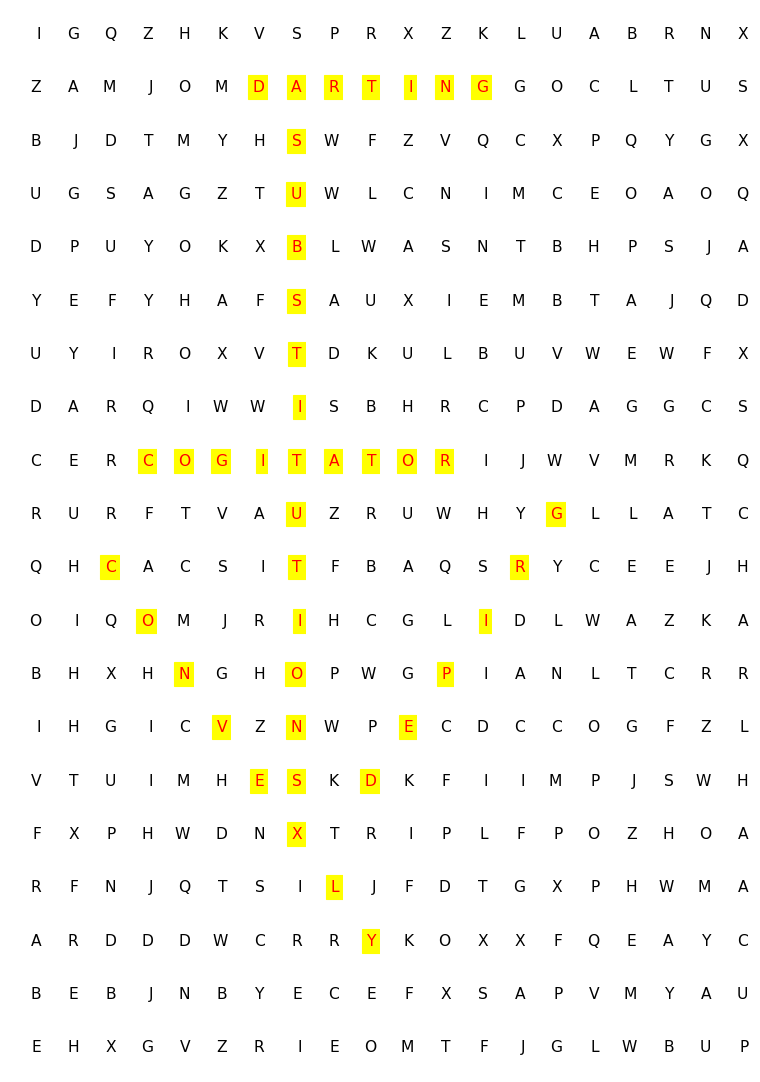

['SUBSTITUTIONS', 'GRIPED', 'COGITATOR', 'CONVEXLY', 'DARTING']

In [98]:
fig = plt.figure(dpi=80)
ax = fig.add_subplot(1,1,1)
table = ax.table(cellText=grid, loc = 'center')
table.set_fontsize(14)
table.scale(2,4)
ax.axis('off')
for key, cell in table.get_celld().items():
    cell.set_linewidth(0)
table_props = table.properties()
table_cells = table_props['child_artists']
for cell in table_cells: 
        cell._text.set_fontsize(20)
        cell._text.set_color('black')
plt.savefig("Puzzle.png", dpi=50)
for alist in positions_to_color:
    for (i,j) in alist:
            table._cells[(i, j)]._text.set_fontsize(14)
            table._cells[(i, j)]._text.set_color('red')
            table._cells[(i, j)]._text.set_backgroundcolor('yellow')
plt.savefig("PuzzleSolved.png", dpi=50)
plt.show()
dictionary